Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Load the Dataset

In [2]:
# Load dataset
iris = load_iris()
X = iris.data[:,:2]
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Define Weak Learner (Decision Stump)

In [3]:
# Weak learner: Decision Tree with depth = 1
weak_learner = DecisionTreeClassifier(max_depth=1)


Apply AdaBoost Classifier

In [4]:
adaboost = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=10,
    learning_rate=0.5,
    random_state=1
)

# Train the model
adaboost.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=10, random_state=1)

Make Predictions

In [5]:
y_pred = adaboost.predict(X_test)


In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Accuracy : 0.7555555555555555
Precision: 0.7666666666666666
Recall   : 0.7341430499325236
F1 Score : 0.7275132275132274


In [7]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[17  0  2]
 [ 0  6  7]
 [ 0  2 11]]


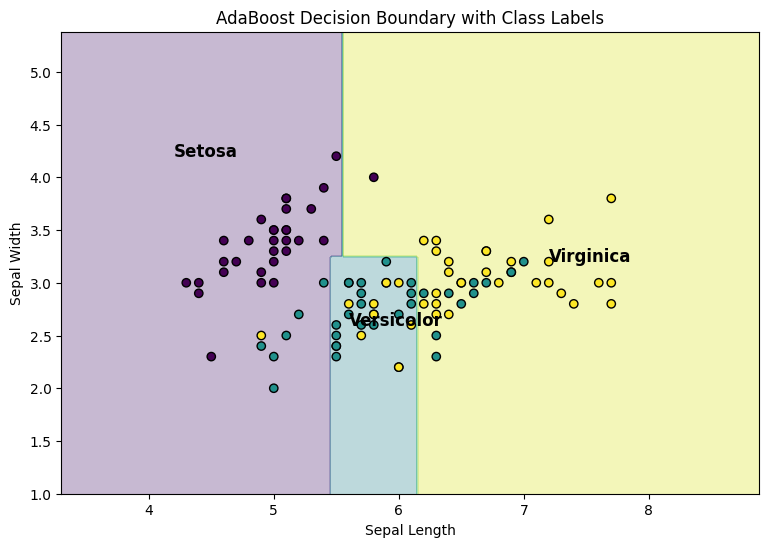

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define feature ranges
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create mesh grid
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Predict class for each point in grid
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(9, 6))
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot training points
scatter = plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    edgecolor='k'
)

# Axis labels
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("AdaBoost Decision Boundary with Class Labels")

# ---- ADD CLASS LABELS MANUALLY ----
plt.text(4.2, 4.2, "Setosa", fontsize=12, weight='bold')
plt.text(5.6, 2.6, "Versicolor", fontsize=12, weight='bold')
plt.text(7.2, 3.2, "Virginica", fontsize=12, weight='bold')

plt.show()



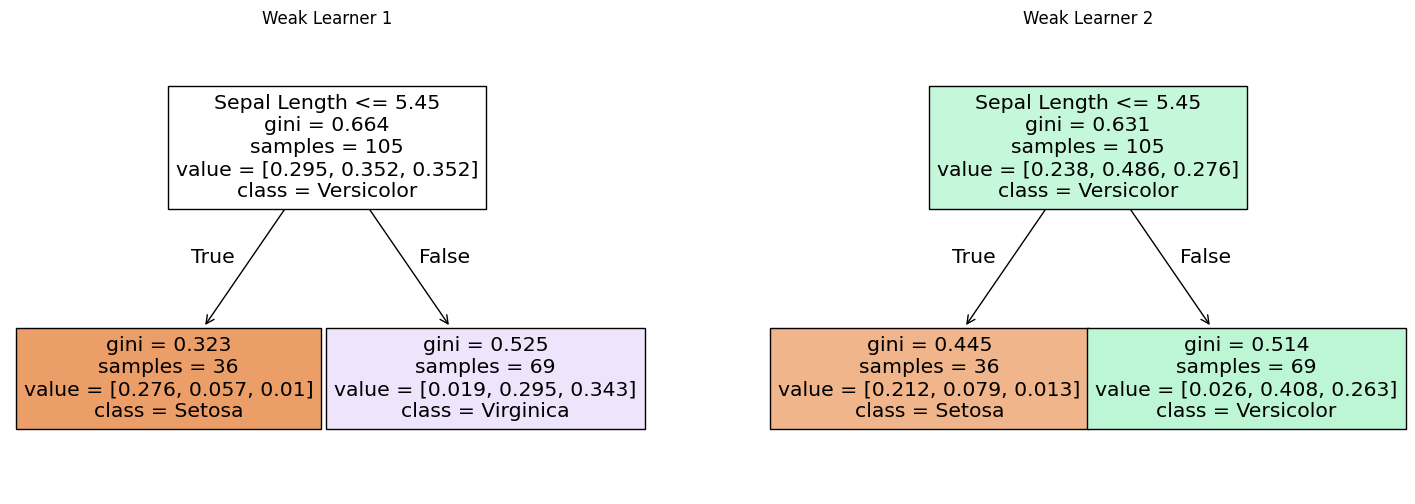

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Number of trees to visualize
n_trees_to_plot = 2

plt.figure(figsize=(18, 6))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)
    plot_tree(
        adaboost.estimators_[i],
        feature_names=["Sepal Length", "Sepal Width"],
        class_names=["Setosa", "Versicolor", "Virginica"],
        filled=True
    )
    plt.title(f"Weak Learner {i+1}")

plt.show()
